# Assignment 4 - Validation & Experimentation

The goal of this assignment is to practice using good experimental design and methodology to train and test classifiers.  You will write some simple code to try doing this yourself, and you will also use the tools built into scikit-learn.

**CSC 8515 - Machine Learning  
Assignment 4  
Scaffolding by Dr. Ben Mitchell  
Assignment completed by: James Fung  
Resources used: In creating a 2D array: https://stackoverflow.com/questions/6667201/how-to-define-a-two-dimensional-array-in-python**

In [1]:
# import math and numpy first
import math
import numpy as np
import scipy
# import some data and classifiers to play with
from sklearn import datasets
from sklearn import neighbors
from sklearn import svm
# import some validation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix

### Load some data
First we'll load the iris dataset again, since it's small and easy to play with.

In [2]:
iris = datasets.load_iris()
# let's show the shape, just to remind ourselves
print('dataset shape:', iris.data.shape, 'target shape:', iris.target.shape)

dataset shape: (150, 4) target shape: (150,)


# Part 1: Repeated hold-out validation
We've already done 'hold-out' validation using the `train_test_split` method, but we've used a fixed seed value.  In the last assignment, we manually changed the seed for the random-number generator to get different train/test splits so we could see how the performance of our classifiers changed.  This time, let's write a loop to do the same thing for us.  Copy your code from the previous assignment to split the data 60/40 and then train and test a SVM classifier with an RBF kernel, and put it inside a `for`-loop that runs 10 times.  Each time, seed the `train_test_split` function with the current loop iteration counter (i.e. the first time through, `train_test_split` should be 0, the second time through it should be 1, etc.).  The result should be 10 accuracy scores, which should be stable (i.e. if you re-run the cell, you get the same 10 numbers)

In [3]:
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=i)
    rbfSvm = svm.SVC(kernel='rbf')
    rbfSvm.fit(X_train,y_train)
    print(rbfSvm.score(X_test,y_test))

0.95
0.983333333333
0.966666666667
0.966666666667
0.983333333333
0.983333333333
0.966666666667
0.966666666667
0.95
1.0


### Random seed

Now try making a copy of the loop, but leave off the `random_state` argument entirely.  This version of the loop should give you output that is generally similar to the previous one, but each time you re-run it, you should get different scores.  This is because the 'default' for the `train_test_split` function is to not use a static seed value, so every time you run it you'll get a different result.

In [4]:
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
    rbfSvm = svm.SVC(kernel='rbf')
    rbfSvm.fit(X_train,y_train)
    print(rbfSvm.score(X_test,y_test))
    i += 1

1.0
0.966666666667
0.966666666667
0.983333333333
0.983333333333
1.0
0.966666666667
0.966666666667
0.95
0.983333333333


# Part 2: Computing Statistics

Make copy of the previous cell (i.e. the loop without fixed seeds), but this time instead of printing the individual scores, store them in a list.  The easiest way to do this is to start with an empty list (e.g. `myList = []`), and then add numbers using the `.append()` method.  After the loop is done, print out your list to be sure it looks the way you expect (you should be able to do this with a single print, e.g. `print(myList)`)

In [5]:
scores = []
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
    rbfSvm = svm.SVC(kernel='rbf')
    rbfSvm.fit(X_train,y_train)
    scores.append(rbfSvm.score(X_test,y_test))
print(scores)

[1.0, 0.96666666666666667, 0.91666666666666663, 0.94999999999999996, 0.94999999999999996, 0.91666666666666663, 0.94999999999999996, 0.96666666666666667, 0.98333333333333328, 1.0]


### Average
Compute the average of the list of numbers you made in the previous step; this is the average accuracy over your 10 trials

In [6]:
score = 0
for i in scores:
    score += i
average = score/len(scores)
average

0.95999999999999996

### Variance & Standard Deviation
Now compute the variance and standard deviation of your list of accuracies.  The standard deviation is the square root of the variance, and the variance is basically just the average squared differences from the mean.  

This will be a bit like the loop you wrote to calculate Euclidean distance, only now you're subtracting the mean rather than a coordinate of another point, and you're going to be dividing by the number of items in the list minus one before you take the square root.  


Note that the symbol for standard deviation is $\sigma$; there's no standard symbol for variance, it's just $\sigma^2$.  Here's the equations, where $N$ is the number of items in the list, $x_i$ is the $i$-th element of the list, and $\mu$ is the mean:

$ \sigma^2 = \frac{1}{N-1} \sum_{i=1}^n (x_i - \mu)^2 $

$ \sigma = \sqrt{\sigma^2} $

In [7]:
summation = 0
for i in scores:
    summation += (i - average)*(i - average)
variance = (summation)/(len(scores)-1)
stddev = variance ** 1/2
print(variance)
print(stddev)

0.000876543209877
0.000438271604938


### Stats using scipy
To check and see if you've calculated your statistics correctly, you can use the `scipy.stats` library.  In particular, if you call the method `scipy.stats.describe()` and give it a list of numbers as an argument, it will report a variety of statistics, including mean and variance.  Make sure that these values match the ones you've calculated above.  See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html#scipy.stats.describe for documentation.

In the future, it's fine to use the stats library to do this kind of thing for you, but it's a lot easier to understand the numbers coming out of the stats library once you've written code to calculate those numbers yourself.  You can also use this as a reference implementation, to check that your own code produces the same values.

In [8]:
scipy.stats.describe(scores)

DescribeResult(nobs=10, minmax=(0.91666666666666663, 1.0), mean=0.95999999999999996, variance=0.00087654320987654412, skewness=-0.11032054850815941, kurtosis=-0.9910731997619524)

# Part 3: K-Fold Cross-validation

Now we'll use scikit-learn to do some more complicated types of validation.  Repeatedly re-spliting the data is okay, but it's not ideal from a statistical reliability standpoint (as we discussed in class).  Therefore, a better practice is to use k-fold cross-validation, as shown in this example.  Note the parameter `cv=5`; this is how many 'folds' to use, and will also be how many scores you get out.

In [9]:
clf = svm.SVC(kernel='rbf')
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

### Statistics on the accuracies

Since `cross_val_score` returns a numpy array, we can use some of the numpy methods to get the mean and standard deviation:

In [10]:
print('mean accuracy:', scores.mean(), ', stdDev:', scores.std())

mean accuracy: 0.98 , stdDev: 0.0163299316186


## Repeated K-fold (aka N-by-K fold)
If you try running the cross-validation cell multiple times, you'll notice you get the same values back every time.  That's because `cross_val_score` doesn't shuffle the data randomly every time you call it.  If we actually want to re-run cross-validation with a new set of point-to-fold assignmenst, we can use the function `RepeatedKFold`, to get a set of folds, and then hand it to `cros_val_score` like this:

In [11]:
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3)
scores2 = cross_val_score(clf, iris.data, iris.target, cv = rkf)
scores2

array([ 0.93333333,  0.96666667,  1.        ,  0.96666667,  0.93333333,
        0.93333333,  1.        ,  0.96666667,  0.96666667,  1.        ,
        0.96666667,  1.        ,  1.        ,  1.        ,  1.        ])

In [12]:
print('mean accuracy:', scores2.mean(), ', stdDev:', scores2.std())

mean accuracy: 0.975555555556 , stdDev: 0.0257240820062


# Try using N-by-K to compare some classifiers

Last week, we tried to compare some classifiers by hand; this week, lets use cross-validation and statistics.

First, we'll run 5-fold cross-validation with 5 repeats to train and test a Nearest Neighbor classifier and a Linear-kernel SVM.  Each should give you an array of 20 accuracy values.  Print the mean and standard deviation for each classifier, then print the difference between the means.  Finally, use `scipy.stats.mannwhitneyu()` to check the $p$ value and see whether the difference is statistically significant (just hand it the two score arrays as inputs).

In [13]:
rkf = RepeatedKFold(n_splits = 100, n_repeats = 100)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean = 0.9608 , stdDev = 0.166773379171
Linear SVM: mean = 0.9797 , stdDev = 0.122425119971
Difference between means: 0.0189


MannwhitneyuResult(statistic=48561575.0, pvalue=3.0204864868186494e-23)

## Compare different values of K and N

Repeat the above experiment using the values of K and N below, and report the mean, stdDev, differece between the means, and p-value for each.  The first row has been completed for you (note that your numbers may be slightly different, since this is a stochastic process).  Also notice how long these take to finish (though you don't need to write that down).  Once the table is complete, look at it and try to see what patterns you can spot.

***

Folds | Repeats  |   NN-mean  |  NN-stdev  | SVM-mean  |  SVM-stdDev  |  difference   |  p-value
------|----------|------------|------------|-----------|--------------|---------------|--------------
5     |      4   |    0.957   |   0.035    |  0.977    |   0.032      |     0.033     |   0.032
2     |      10  |    0.952   |   0.023    |  0.967    |   0.016      |     0.015     |   0.023
10    |      2   |    0.957   |   0.044    |  0.980    |   0.037      |     0.023     |   0.033
10    |      10  |    0.959   |   0.047    |  0.974    |   0.364      |     0.153     |   0.011
10    |     100  |    0.959   |   0.049    |  0.978    |   0.038      |     0.187     |   8.8233e-22
100   |      10  |    0.959   |   0.175    |  0.981    |   0.113      |     0.022     |   0.001
100   |     100  |    0.961   |   0.166    |  0.981    |   0.117      |     0.020     |   4.553e-25

If the ratio of repeats to folds is very high, the mean metric is fairly reliable. This is evident through the model standard deviations, which is much less than runs where there are more folds than repeats. The more repeats, however, the more time it takes to run. 

I also noticed that the p-value from the Mann Whitney tests are very small in in the 10 fold 100 repeats and 100 folds 100 repeats. I assume this is due to the high "n's" (number of metrics fed into the test.)

# Part 4: Alternative Metrics

Up until now, we've just worked with overall accuracy as our only way of "scoring" the performance of a classifier.  Now, we will try out some alternative tools for evaluating classifier performance.  In addition to the `.scores()` method, scikit-learn classifiers have a `.predict()` method which takes in a set of examples as an argument, and returns an array with the predicted labels for those examples.  Here's an example:

In [14]:
train, test, trainLabels, testLabels = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
clf = svm.SVC(kernel='linear')
clf.fit(train, trainLabels)
predictions = clf.predict(test)
print('predicted labels: ', predictions)
print('true labels: ', testLabels)

predicted labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]
true labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]


## Confusion Matrix

By comparing the predicted labels to the 'true' labels, we could easily compute accuracy like we've done in the past.  This time, however, we want to drill down and get more details, so we're going to build a confusion matrix.

A confusion matrix works by making a 2D array (i.e. a matrix), with the rows corresponding to 'true' class labels and the columns corresponding to 'predicted' class labels.  You just need to loop over the pairs of corresponding true/predicted labels, and add to the count in the corresponding cell of the array.

In [15]:
#Initialize the matrix

#For some reason, this produces a flat 2D array? However the results were the same as numpy, just visually different.
#confusion = [[0 for y in range(3)] for x in range(3)]

#I used numpy just in case here.
confusion = np.zeros((3,3))
confusion

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [16]:
for prediction, true in zip(predictions,testLabels):
    confusion[prediction][true] += 1
confusion

array([[ 16.,   0.,   0.],
       [  0.,  22.,   1.],
       [  0.,   1.,  20.]])

### Confusion Matrix using scikit-learn

We can also ask scikit-learn to generate a confusion matrix for us, as the following example shows.  Your own confusion matrix should look just like the one produced by the library.

In [17]:
confMat = confusion_matrix(testLabels, predictions)
print(confMat)

[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]


## Fancy Graphics

It's also possible to use Python's plotting tools to make fancy graphical versions of a confusion matrix; the following example is adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html.  _NOTE:_ it's fine if you don't understand what this function is doing; we haven't really covered making plots yet.  For now, it's okay if this is just magic.

In [18]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



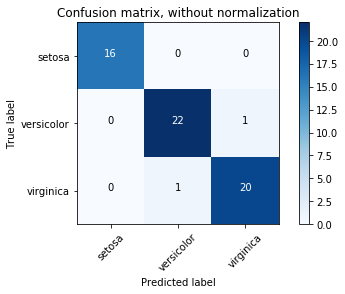

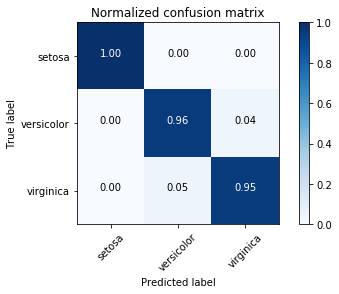

In [19]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMat, classes=iris.target_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMat, classes=iris.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()